<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/Sarang_Manohar_Data_mining_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [120]:
raw_data = pd.read_csv(r'insurance_part2_data.csv')
raw_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [121]:
raw_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [122]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [123]:
raw_data.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [124]:
for x in ['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel','Duration', 'Sales', 'Product Name', 'Destination']:
    print(x.upper(),':',raw_data[x].nunique())
    print(raw_data[x].value_counts())
    print('\n')

AGE : 70
36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


AGENCY_CODE : 4
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


TYPE : 2
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


CLAIMED : 2
No     2076
Yes     924
Name: Claimed, dtype: int64


COMMISION : 324
0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


CHANNEL : 2
Online     2954
Offline      46
Name: Channel, dtype: int64


DURATION : 257
 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


SALES : 380
20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00   

In [125]:
raw_data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


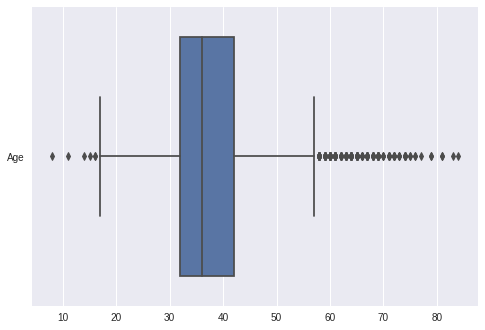

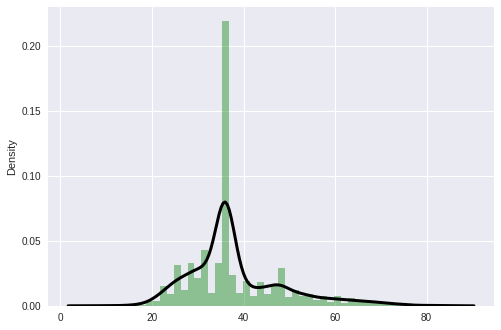

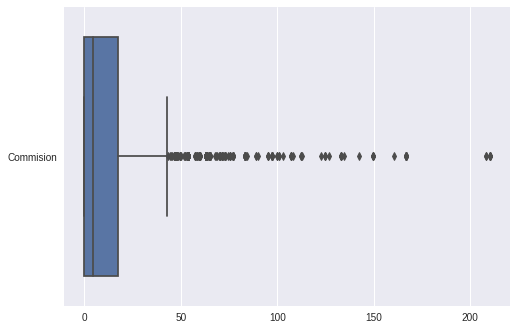

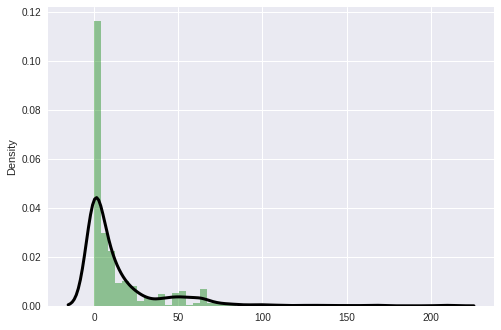

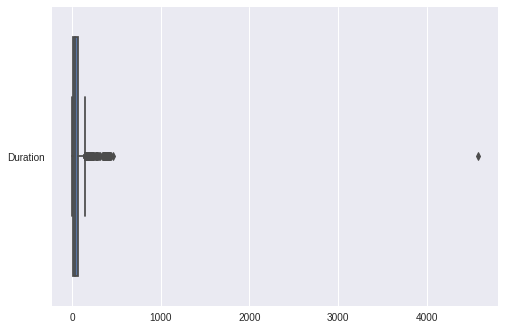

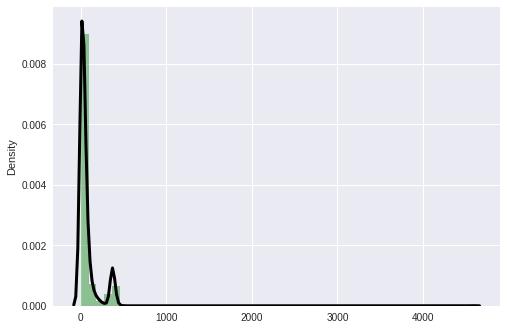

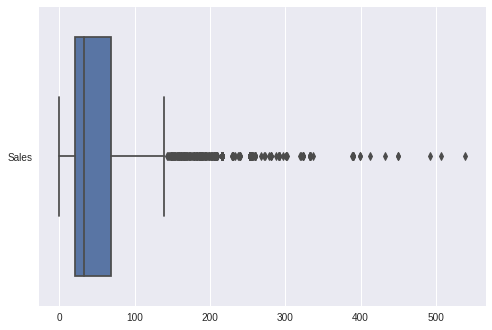

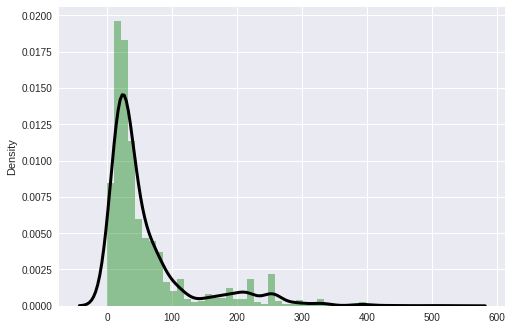

In [126]:
sns.boxplot(data=raw_data[{'Age'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Age'}],hist_kws = {'color':'g', 'label':'Age'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Commision'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Commision'}],hist_kws = {'color':'g', 'label':'Commision'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Duration'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Duration'}],hist_kws = {'color':'g', 'label':'Duration'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Sales'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Sales'}],hist_kws = {'color':'g', 'label':'Sales'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()

In [127]:
outlier = []
for x in ['Age','Commision','Duration','Sales']:
    q1, q3 = np.percentile(raw_data[x],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for y in raw_data[x]:
        if y<lower_bound:
            outlier.append(raw_data[x])
        elif y>upper_bound:
            outlier.append(raw_data[x])
    #print(outlier)
    print('Percent of outliers for ',x,'is',len(outlier)/3000)

Percent of outliers for  Age is 0.068
Percent of outliers for  Commision is 0.18866666666666668
Percent of outliers for  Duration is 0.316
Percent of outliers for  Sales is 0.43366666666666664


In [128]:
raw_data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [129]:
raw_data[raw_data.Age<18]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
480,17,C2B,Airlines,No,20.38,Online,21,81.5,Silver Plan,ASIA
1064,17,C2B,Airlines,Yes,51.75,Online,64,207.0,Gold Plan,ASIA
1273,14,CWT,Travel Agency,Yes,10.50,Offline,31,30.0,Customised Plan,ASIA
1558,8,CWT,Travel Agency,No,9.57,Offline,50,29.0,Customised Plan,ASIA
1673,16,C2B,Airlines,Yes,54.00,Online,373,216.0,Silver Plan,ASIA
1940,15,CWT,Travel Agency,No,10.50,Offline,53,30.0,Customised Plan,ASIA
1962,17,C2B,Airlines,Yes,5.00,Online,9,20.0,Bronze Plan,ASIA
2724,11,C2B,Airlines,No,15.75,Online,27,63.0,Silver Plan,ASIA
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.0,Bronze Plan,ASIA


In [130]:
raw_data[raw_data.Duration<1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [281]:
raw_data[raw_data.Sales == 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
131,53,JZI,Airlines,No,12.95,Online,93,0.0,Bronze Plan,ASIA
162,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
323,54,CWT,Travel Agency,No,100.98,Online,18,0.0,Customised Plan,Americas
483,44,CWT,Travel Agency,No,11.88,Online,10,0.0,Customised Plan,ASIA
513,31,CWT,Travel Agency,No,83.16,Online,99,0.0,Customised Plan,EUROPE
537,34,CWT,Travel Agency,No,11.88,Online,45,0.0,Customised Plan,ASIA
612,33,CWT,Travel Agency,No,17.82,Online,4,0.0,Customised Plan,ASIA
646,31,CWT,Travel Agency,No,11.88,Online,144,0.0,Customised Plan,ASIA
703,30,JZI,Airlines,No,7.70,Online,9,0.0,Bronze Plan,ASIA
766,36,EPX,Travel Agency,No,0.00,Online,7,0.0,Cancellation Plan,ASIA


In [131]:
raw_data.Duration.mean()

70.00133333333333

In [132]:
raw_data.Duration.median()

26.5

In [133]:
raw_data[raw_data.duplicated()==True]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [134]:
raw_data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [135]:
for feature in raw_data.columns: 
    if raw_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(raw_data[feature].unique()))
        print(pd.Categorical(raw_data[feature].unique()).codes)
        raw_data[feature] = pd.Categorical(raw_data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [136]:
raw_data.sample(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
284,33,0,0,1,54.00,1,365,216.0,4,0
766,36,2,1,0,0.00,1,7,0.0,1,0
2454,31,0,0,0,58.35,1,380,233.4,4,0
201,28,1,1,0,0.00,0,367,97.0,2,1
724,64,0,0,1,6.75,1,11,27.0,0,0
2065,36,2,1,0,0.00,1,3,20.0,2,0
2496,30,0,0,1,17.38,1,22,69.5,0,0
2503,62,3,0,0,9.10,1,195,26.0,0,0
2597,31,1,1,1,29.70,1,10,49.5,2,0
1943,74,2,1,0,0.00,1,39,10.0,1,0


In [137]:
raw_data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [138]:
X = raw_data.drop(['Claimed'], axis=1)
y = raw_data.pop('Claimed')

In [139]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [140]:
train_labels.value_counts(normalize=True)

0    0.700476
1    0.299524
Name: Claimed, dtype: float64

In [141]:
test_labels.value_counts(normalize=True)

0    0.672222
1    0.327778
Name: Claimed, dtype: float64

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, train_labels)

In [142]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [143]:
np.random.randint(0, len(raw_data))

1032

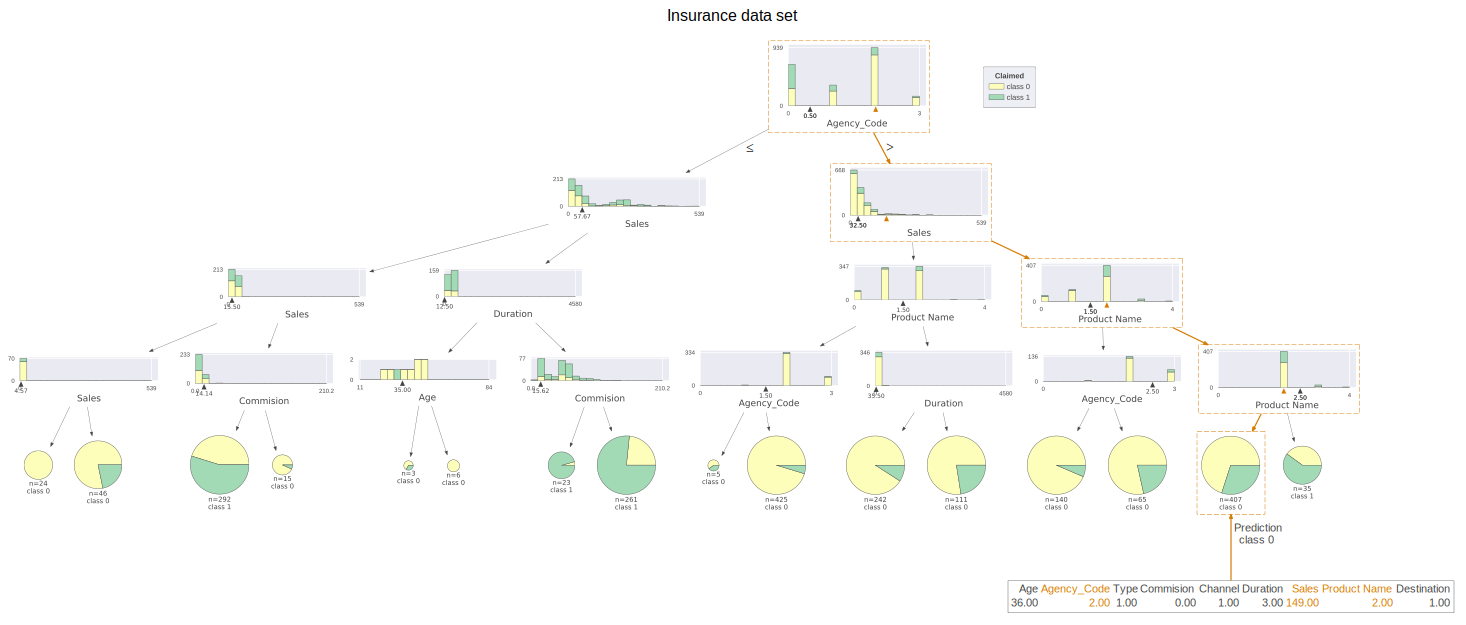

In [144]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=4, criterion='gini')

dt.fit(X_train, train_labels)

X = raw_data.loc[np.random.randint(0, len(raw_data))]

viz = dtreeviz(dt,
               X_train,
               train_labels,
               target_name='Claimed',  # this name will be displayed at the leaf node
               feature_names=raw_data.columns,
               title="Insurance data set",
               fontname="Arial",
               title_fontsize=16,
               colors = {"title":"black"},
               X=X
              )
viz
# viz.view() will give give a popup with graph in pdf

In [145]:
dt.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

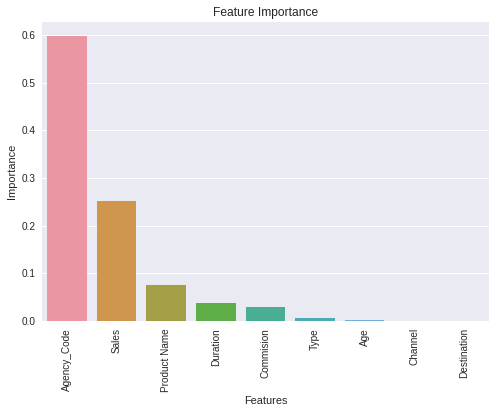

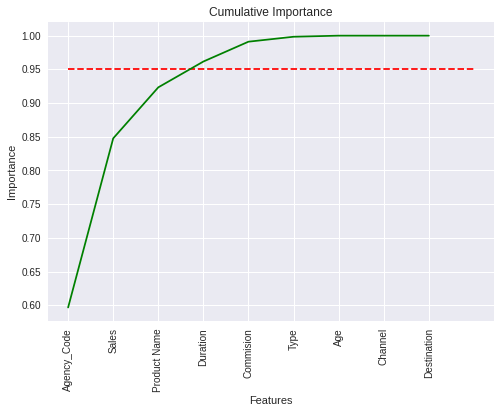

In [146]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [199]:
dt_param_grid = {
    'max_depth' : [6],
    'min_samples_leaf' : [15],
    'min_samples_split' : [50]
}
dt_ht = DecisionTreeClassifier(criterion='gini')
dt_gs = GridSearchCV(estimator=dt_ht, param_grid=dt_param_grid, cv = 3)
dt_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6], 'min_samples_leaf': [15],
         

In [200]:
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_
ytrain_predict = best_dt.predict(X_train)
ytest_predict = best_dt.predict(X_test)

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}


In [177]:
#{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 40}
#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

[[1299  172]
 [ 251  378]]
0.7985714285714286
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.60      0.64       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [180]:
#{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 60}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1321  150]
 [ 269  360]]
Accuracy score : 80.0 percent
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



Decision tree stats on test data:
[[555  50]
 [167 128]]
Accuracy score : 75.9 percent
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



###### Best set of hyper parameters with accuracy score difference of ***2%*** between train and test data is 

---
**{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}**


In [201]:
#{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [192]:
#{'max_depth': 6, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1289  182]
 [ 226  403]]
Accuracy score : 80.6 percent
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1471
           1       0.69      0.64      0.66       629

    accuracy                           0.81      2100
   macro avg       0.77      0.76      0.76      2100
weighted avg       0.80      0.81      0.80      2100



Decision tree stats on test data:
[[539  66]
 [137 158]]
Accuracy score : 77.4 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.54      0.61       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.73       900
weighted avg       0.77      0.77      0.77       900



In [189]:
#{'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1304  167]
 [ 192  437]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1471
           1       0.72      0.69      0.71       629

    accuracy                           0.83      2100
   macro avg       0.80      0.79      0.79      2100
weighted avg       0.83      0.83      0.83      2100



Decision tree stats on test data:
[[524  81]
 [143 152]]
Accuracy score : 75.1 percent
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       605
           1       0.65      0.52      0.58       295

    accuracy                           0.75       900
   macro avg       0.72      0.69      0.70       900
weighted avg       0.74      0.75      0.74       900



In [186]:
#{'min_samples_split': 30}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1331  140]
 [ 192  437]]
0.8419047619047619
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1471
           1       0.76      0.69      0.72       629

    accuracy                           0.84      2100
   macro avg       0.82      0.80      0.81      2100
weighted avg       0.84      0.84      0.84      2100



Decision tree stats on test data:
[[512  93]
 [155 140]]
0.7244444444444444
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       605
           1       0.60      0.47      0.53       295

    accuracy                           0.72       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.71      0.72      0.71       900



In [195]:
#{'min_samples_split': 10}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1409   62]
 [ 150  479]]
0.8990476190476191
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1471
           1       0.89      0.76      0.82       629

    accuracy                           0.90      2100
   macro avg       0.89      0.86      0.87      2100
weighted avg       0.90      0.90      0.90      2100



Decision tree stats on test data:
[[518  87]
 [163 132]]
0.7222222222222222
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       605
           1       0.60      0.45      0.51       295

    accuracy                           0.72       900
   macro avg       0.68      0.65      0.66       900
weighted avg       0.71      0.72      0.71       900



In [198]:
#{'min_samples_split': 5}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1439   32]
 [  93  536]]
Accuracy score : 94.0 percent
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1471
           1       0.94      0.85      0.90       629

    accuracy                           0.94      2100
   macro avg       0.94      0.92      0.93      2100
weighted avg       0.94      0.94      0.94      2100



Decision tree stats on test data:
[[508  97]
 [160 135]]
Accuracy score : 71.4 percent
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       605
           1       0.58      0.46      0.51       295

    accuracy                           0.71       900
   macro avg       0.67      0.65      0.66       900
weighted avg       0.70      0.71      0.70       900



Area under ROC : 84.9 percent
Best Threshold=0.312883, G-Mean=0.767


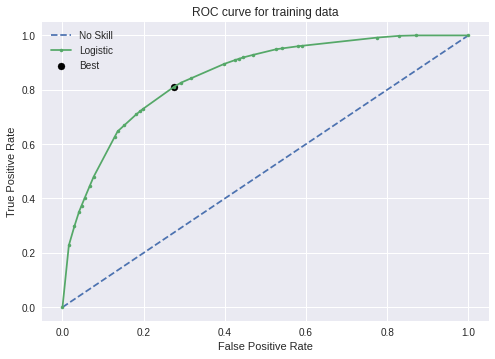

In [202]:
train_prob = best_dt.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 79.7 percent
Best Threshold=0.270270, G-Mean=0.736


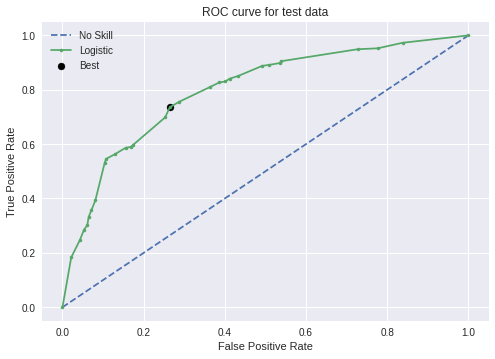

In [203]:
test_prob = best_dt.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

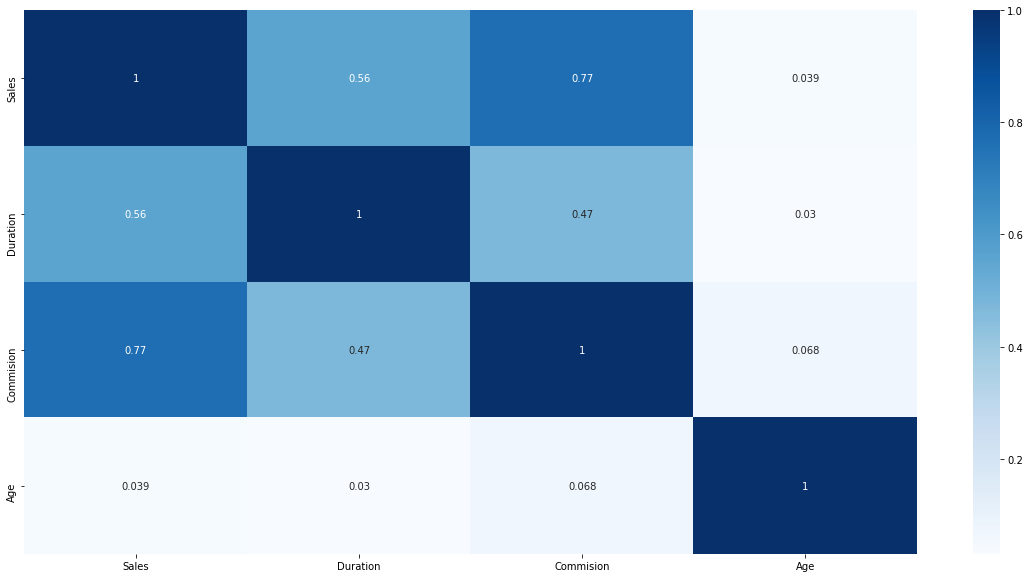

In [ ]:
corr = raw_data[{'Age','Commision','Duration','Sales'}].corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()

### Random Forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

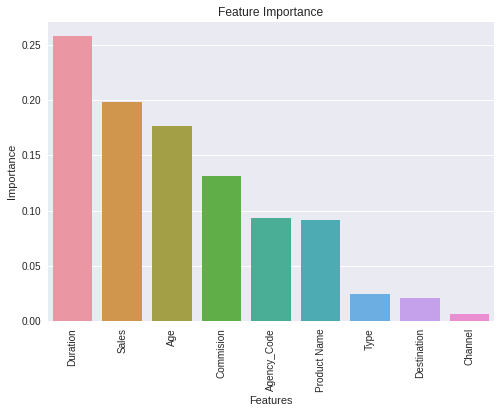

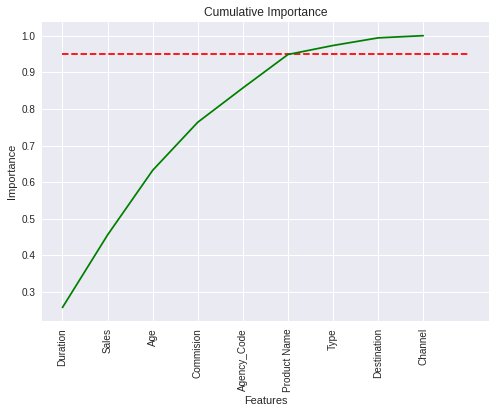

In [92]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [226]:
rf_param_grid = {
    #'max_depth' : [6],
    #'min_samples_leaf' : [15],
    'min_samples_split' : [50],
    'max_features' : [3],
    'n_estimators' : [100]
}

In [227]:
rf_ht = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_ht, param_grid=rf_param_grid, cv = 3)
rf_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [228]:
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
ytrain_predict = best_rf.predict(X_train)
ytest_predict = best_rf.predict(X_test)

{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}


###### Best set of hyper parameters with accuracy score difference of ***~5.5%*** and with better precision and recall for class 1 between train and test data is 

---
**{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}**

In [229]:
#{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1347  124]
 [ 242  387]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.62      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[551  54]
 [152 143]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [225]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1331  140]
 [ 252  377]]
Accuracy score : 81.3 percent
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.73      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.79      0.75      0.76      2100
weighted avg       0.81      0.81      0.81      2100



Random Forest stats on test data:
[[557  48]
 [149 146]]
Accuracy score : 78.1 percent
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       605
           1       0.75      0.49      0.60       295

    accuracy                           0.78       900
   macro avg       0.77      0.71      0.72       900
weighted avg       0.78      0.78      0.77       900



In [221]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1329  142]
 [ 271  358]]
Accuracy score : 80.3 percent
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1471
           1       0.72      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



Random Forest stats on test data:
[[554  51]
 [160 135]]
Accuracy score : 76.6 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



In [217]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1340  131]
 [ 266  363]]
Accuracy score : 81.1 percent
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.73      0.58      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.74      0.76      2100
weighted avg       0.80      0.81      0.80      2100



Random Forest stats on test data:
[[556  49]
 [157 138]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.77      0.75       900



In [213]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 300}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1330  141]
 [ 270  359]]
Accuracy score : 80.4 percent
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1471
           1       0.72      0.57      0.64       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



Random Forest stats on test data:
[[554  51]
 [157 138]]
Accuracy score : 76.9 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



Area under ROC : 88.9 percent
Best Threshold=0.311991, G-Mean=0.808


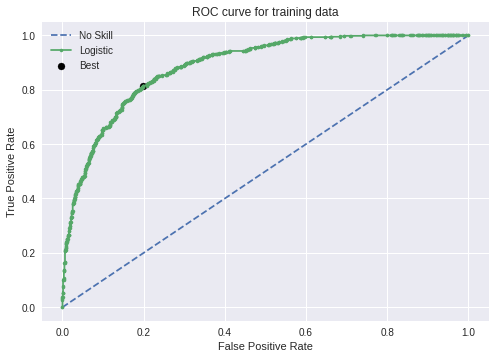

In [230]:
train_prob = best_rf.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 82.4 percent
Best Threshold=0.318210, G-Mean=0.766


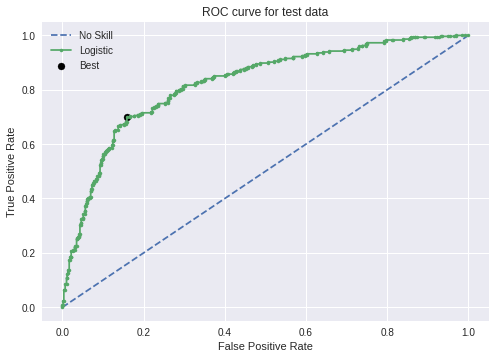

In [231]:
test_prob = best_rf.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

In [232]:
raw_data1 = pd.read_csv(r'insurance_part2_data.csv')

In [233]:
for feature in raw_data1.columns: 
    if raw_data1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(raw_data1[feature].unique()))
        print(pd.Categorical(raw_data1[feature].unique()).codes)
        raw_data1[feature] = pd.Categorical(raw_data1[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [234]:
raw_data1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [235]:
ss = StandardScaler()

X = raw_data1.drop(['Claimed'], axis=1)
y = raw_data1.pop('Claimed')

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [236]:
nn = MLPClassifier()
nn.fit(X_train_s, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0.5, 1.0, 'Loss curve')

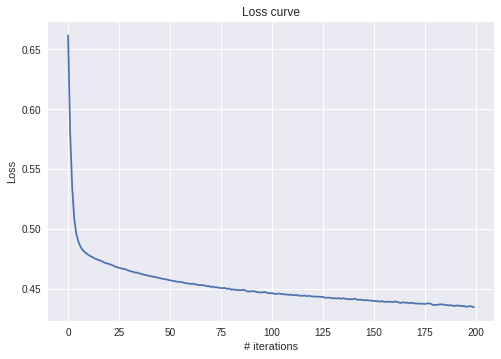

In [237]:
plt.plot(nn.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('# iterations')
plt.title('Loss curve')

In [238]:
nn.n_iter_

200

In [251]:
nn_param_grid = {
    'hidden_layer_sizes' : [200],
    'activation' : ['relu'],
    'solver' : ['adam'],
    'max_iter' : [10000],
    'tol' : [0.0001],
    'verbose' : [True],
    'random_state' : [1]
}

In [252]:
nn_ht = MLPClassifier()
nn_gs = GridSearchCV(estimator=nn_ht, param_grid=nn_param_grid, cv = 3)
nn_gs.fit(X_train_s, train_labels)

print(nn_gs.best_params_)

best_nn = nn_gs.best_estimator_
ytrain_predict = best_nn.predict(X_train_s)
ytest_predict = best_nn.predict(X_test_s)

Iteration 1, loss = 0.61209856
Iteration 2, loss = 0.55694906
Iteration 3, loss = 0.52457643
Iteration 4, loss = 0.50590105
Iteration 5, loss = 0.49507255
Iteration 6, loss = 0.48884132
Iteration 7, loss = 0.48524318
Iteration 8, loss = 0.48254342
Iteration 9, loss = 0.48078942
Iteration 10, loss = 0.47964368
Iteration 11, loss = 0.47839415
Iteration 12, loss = 0.47714213
Iteration 13, loss = 0.47644426
Iteration 14, loss = 0.47519835
Iteration 15, loss = 0.47444710
Iteration 16, loss = 0.47324215
Iteration 17, loss = 0.47234051
Iteration 18, loss = 0.47168609
Iteration 19, loss = 0.47084604
Iteration 20, loss = 0.47010669
Iteration 21, loss = 0.46921772
Iteration 22, loss = 0.46843323
Iteration 23, loss = 0.46782498
Iteration 24, loss = 0.46712353
Iteration 25, loss = 0.46637426
Iteration 26, loss = 0.46585312
Iteration 27, loss = 0.46510633
Iteration 28, loss = 0.46444096
Iteration 29, loss = 0.46383866
Iteration 30, loss = 0.46324196
Iteration 31, loss = 0.46291730
Iteration 32, los

In [253]:
print(best_nn)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)


In [242]:
#{'activation': 'relu', 'hidden_layer_sizes': 150, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1304  167]
 [ 231  398]]
Accuracy score : 81.0 percent
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1471
           1       0.70      0.63      0.67       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



Artificial Neural Network stats on test data:
[[541  64]
 [147 148]]
Accuracy score : 76.6 percent
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       605
           1       0.70      0.50      0.58       295

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [246]:
#{'activation': 'relu', 'hidden_layer_sizes': 300, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1343  128]
 [ 255  374]]
Accuracy score : 81.8 percent
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1471
           1       0.75      0.59      0.66       629

    accuracy                           0.82      2100
   macro avg       0.79      0.75      0.77      2100
weighted avg       0.81      0.82      0.81      2100



Artificial Neural Network stats on test data:
[[555  50]
 [160 135]]
Accuracy score : 76.7 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



**{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}**

In [254]:

#{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1316  155]
 [ 241  388]]
Accuracy score : 81.1 percent
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1471
           1       0.71      0.62      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



Artificial Neural Network stats on test data:
[[544  61]
 [152 143]]
Accuracy score : 76.3 percent
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.70      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [250]:
#{'activation': 'relu', 'hidden_layer_sizes': 100, 'max_iter': 10000, 'solver': 'adam', 'tol': 0.001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1316  155]
 [ 303  326]]
Accuracy score : 78.2 percent
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.68      0.52      0.59       629

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Artificial Neural Network stats on test data:
[[558  47]
 [171 124]]
Accuracy score : 75.8 percent
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



Area under ROC : 86.6 percent
Best Threshold=0.298683, G-Mean=0.795


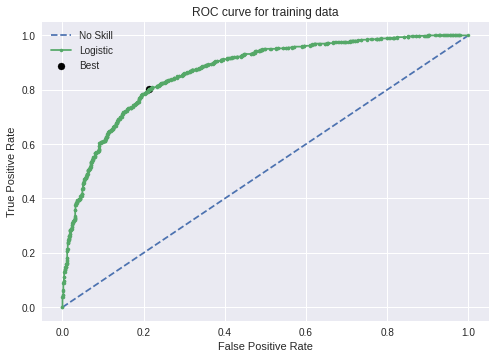

In [255]:
train_prob = best_nn.predict_proba(X_train_s)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 80.8 percent
Best Threshold=0.261542, G-Mean=0.746


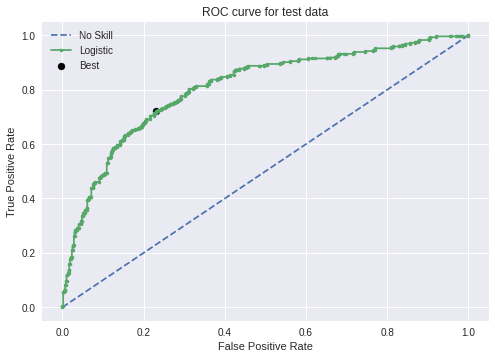

In [256]:
test_prob = best_nn.predict_proba(X_test_s)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

In [258]:
raw_data = pd.read_csv(r'insurance_part2_data.csv')
raw_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [265]:
for features in ['Agency_Code','Product Name','Sales','Commision']:
    print(features,'\n',raw_data[raw_data.Claimed == 'Yes'][features].value_counts())

Agency_Code 
 C2B    560
EPX    193
CWT    141
JZI     30
Name: Agency_Code, dtype: int64
Product Name 
 Silver Plan          306
Customised Plan      254
Bronze Plan          251
Gold Plan             70
Cancellation Plan     43
Name: Product Name, dtype: int64
Sales 
 252.85    54
216.00    46
20.00     31
27.00     20
33.50     19
          ..
124.00     1
154.00     1
178.00     1
164.00     1
93.00      1
Name: Sales, Length: 251, dtype: int64
Commision 
 0.00     196
63.21     56
54.00     47
6.75      19
8.38      19
        ... 
11.55      1
25.13      1
29.13      1
6.88       1
23.40      1
Name: Commision, Length: 209, dtype: int64


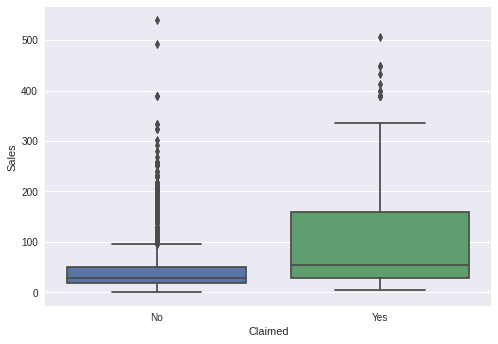

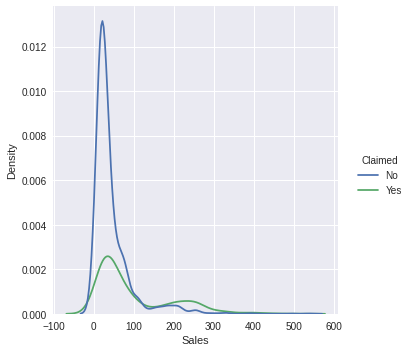

In [275]:
sns.boxplot(data=raw_data, y='Sales',x='Claimed')
plt.show()
sns.displot(data= raw_data, x='Sales',kind='kde',hue='Claimed')
plt.show()

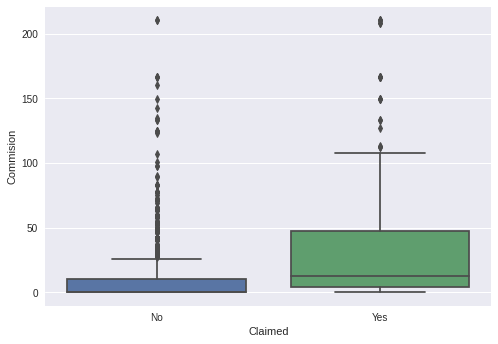

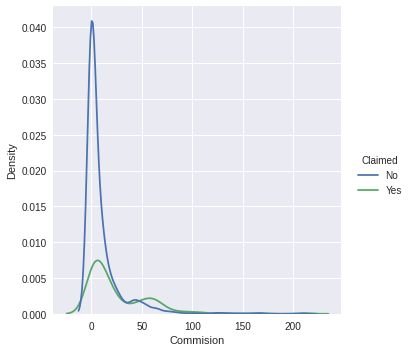

In [276]:
sns.boxplot(data=raw_data, y='Commision',x='Claimed')
plt.show()
sns.displot(data= raw_data, x='Commision',kind='kde',hue='Claimed')
plt.show()

In [280]:
raw_data[raw_data.Sales == 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [282]:
raw_data.groupby('Product Name').mean()

,Age,Commision,Duration,Sales
Product Name,,,,
Bronze Plan,38.412308,11.322938,35.076923,39.446754
Cancellation Plan,36.497050,0.132743,41.026549,31.965988
Customised Plan,38.608275,11.654463,51.676937,47.863697
Gold Plan,41.908257,67.195596,178.688073,179.743578
Silver Plan,37.782201,36.472857,190.177986,139.276815


In [287]:
raw_data.groupby('Product Name').count()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Destination
Product Name,,,,,,,,,
Bronze Plan,650,650,650,650,650,650,650,650,650
Cancellation Plan,678,678,678,678,678,678,678,678,678
Customised Plan,1136,1136,1136,1136,1136,1136,1136,1136,1136
Gold Plan,109,109,109,109,109,109,109,109,109
Silver Plan,427,427,427,427,427,427,427,427,427
